In [ ]:
pip install pandas numpy matplotlib seaborn missingno openpyxl scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path

# display settings
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
sns.set_theme(style="whitegrid")
%matplotlib inline

In [3]:
file_path = Path(r"C:\Users\HP\Documents\fam_lens_ai_assistant\FAMLens Merged.xlsx")
assert file_path.exists(), f"File not found at {file_path}"

xls = pd.ExcelFile(file_path)
print("Sheets:", xls.sheet_names)

Sheets: ['Full Merge']


In [4]:
sheet_name = "Full Merge"  
df = pd.read_excel(file_path, sheet_name=sheet_name)
print("Shape:", df.shape)
df.head(5)

Shape: (195, 18)


,HDI Rank,Country,Human Development Index (HDI),Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank 2022,HDI Category,Human Development Index - Female,Human Development Index - Male,Expected years of schooling - Female,Expected years of schooling - Male,Mean years of schooling - Female,Mean years of schooling - Male,Estimated gross national income per capita - Female,Estimated gross national income per capita - Male,Population_Adult
0,1,Iceland,0.972,18.85059,13.908926,69116.93736,12.0,3,Very High,0.959111,0.9755,20.192450,17.626040,13.991489,13.826582,56441.208584,81198.578187,322325.0
1,17,United States,0.938,15.92300,13.91,73650.03077,-7.0,18,Very High,0.937607,0.929333,16.824800,15.053850,14,13.82,60085.292235,87081.149933,275987833.0
2,2,Norway,0.97,18.79285,13.117962,112710.0211,0.0,1,Very High,0.967123,0.972161,19.718550,17.917339,13.291107,12.955071,94568.748542,130572.891355,4608487.0
3,37,Saudi Arabia,0.9,16.94943,11.606428,50298.91363,-7.0,37,Very High,0.855372,0.918335,17.868429,16.383801,11.036193,11.96711,20287.36652,69767.122876,25248449.0
4,4,Denmark,0.962,18.70401,13.027321,76007.85669,4.0,4,Very High,0.953178,0.962566,19.328671,18.100019,13.239645,12.817209,63411.664132,88753.352175,5003352.0


In [5]:
print("Column datatypes:")
print(df.dtypes)

print("\nNull value counts (descending):")
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts[null_counts > 0])

print("\nNumeric summary (only numeric columns):")
display(df.describe(include=[np.number]).T)

Column datatypes:
HDI Rank                                                  int64
Country                                                  object
Human Development Index (HDI)                            object
Expected years of schooling                             float64
Mean years of schooling                                  object
Gross national income (GNI) per capita                   object
GNI per capita rank minus HDI rank                      float64
HDI rank 2022                                            object
HDI Category                                             object
Human Development Index - Female                         object
Human Development Index - Male                           object
Expected years of schooling - Female                    float64
Expected years of schooling - Male                      float64
Mean years of schooling - Female                         object
Mean years of schooling - Male                           object
Estimated  gross natio

,count,mean,std,min,25%,50%,75%,max
HDI Rank,195.0,9.780513e+01,5.651597e+01,1.00000,4.900000e+01,9.800000e+01,1.465000e+02,1.950000e+02
Expected years of schooling,195.0,1.361922e+01,3.114610e+00,5.63477,1.150739e+01,1.333578e+01,1.589625e+01,2.168724e+01
GNI per capita rank minus HDI rank,193.0,2.020725e-01,1.434528e+01,-54.00000,-7.000000e+00,1.000000e+00,1.000000e+01,3.800000e+01
Expected years of schooling - Female,193.0,1.386705e+01,3.491356e+00,4.51031,1.151759e+01,1.396774e+01,1.645769e+01,2.148183e+01
Expected years of schooling - Male,193.0,1.332591e+01,2.763386e+00,6.57096,1.151691e+01,1.314672e+01,1.534829e+01,2.068305e+01
Population_Adult,120.0,4.421774e+07,1.482232e+08,300138.00000,4.076568e+06,9.187756e+06,2.744651e+07,1.176679e+09


In [6]:
candidates = ["HDI Category", "HDI Category (2019)", "HDI Rank", "Human Development Index (HDI)", "HDI 2022"]
# Show presence & sample unique values
for c in candidates:
    if c in df.columns:
        print(f"\n--- {c} ---")
        print("Unique values (sample):", df[c].dropna().unique()[:30])
        print("Value counts:")
        print(df[c].value_counts(dropna=False).head(20))


--- HDI Category ---
Unique values (sample): ['Very High ' 'High' 'Medium' 'Low']
Value counts:
HDI Category
Very High     74
High          50
Medium        43
Low           28
Name: count, dtype: int64

--- HDI Rank ---
Unique values (sample): [ 1 17  2 37  4  5 13  7 26  8 10 11 28 12 29 46 55 16 34 22 23 24 27 32
 57 60 36 64 38 39]
Value counts:
HDI Rank
17     3
29     3
108    3
117    3
89     3
8      2
13     2
2      2
60     2
62     2
69     2
100    2
133    2
5      2
32     2
55     2
130    2
143    2
157    2
84     2
Name: count, dtype: int64


In [8]:
# helper to coerce object numeric columns to floats
def coerce_numeric_columns(df):
    df = df.copy()
    converted = {}
    for col in df.columns:
        if df[col].dtype == object:
            # try to detect numeric-like strings
            sample = df[col].dropna().astype(str).head(20).tolist()
            if any((s.replace(",","").replace("%","").replace(" ","").replace("−","-").lstrip("-").replace(".","").isdigit()) for s in sample):
                # remove commas, percent sign, non-breaking spaces, parentheses
                df[col] = df[col].astype(str).str.replace(r"[,\u00A0%()]", "", regex=True).str.replace("−","-", regex=False)
                # convert empty or non-numeric to NaN
                df[col] = pd.to_numeric(df[col], errors="coerce")
                converted[col] = df[col].dtype
    return df, converted

df_clean, converted = coerce_numeric_columns(df)
print("Converted object->numeric columns:", list(converted.keys()))

Converted object->numeric columns: ['Human Development Index (HDI) ', 'Mean years of schooling', 'Gross national income (GNI) per capita', 'HDI rank 2022', 'Human Development Index - Female', 'Human Development Index - Male', 'Mean years of schooling - Female', 'Mean years of schooling - Male', 'Estimated  gross national income per capita - Female', 'Estimated  gross national income per capita - Male']


In [9]:
print(df_clean.dtypes)
print("\nNulls after coercion (top 20):")
display(df_clean.isnull().sum().sort_values(ascending=False).head(20))

HDI Rank                                                  int64
Country                                                  object
Human Development Index (HDI)                           float64
Expected years of schooling                             float64
Mean years of schooling                                 float64
Gross national income (GNI) per capita                  float64
GNI per capita rank minus HDI rank                      float64
HDI rank 2022                                           float64
HDI Category                                             object
Human Development Index - Female                        float64
Human Development Index - Male                          float64
Expected years of schooling - Female                    float64
Expected years of schooling - Male                      float64
Mean years of schooling - Female                        float64
Mean years of schooling - Male                          float64
Estimated  gross national income per cap

Population_Adult                                        75
Human Development Index - Female                        11
Estimated  gross national income per capita - Male      11
Estimated  gross national income per capita - Female    11
Human Development Index - Male                          11
HDI rank 2022                                            3
Mean years of schooling - Male                           3
Mean years of schooling - Female                         3
Mean years of schooling                                  2
Human Development Index (HDI)                            2
Expected years of schooling - Male                       2
Expected years of schooling - Female                     2
Gross national income (GNI) per capita                   2
GNI per capita rank minus HDI rank                       2
Country                                                  0
HDI Rank                                                 0
HDI Category                                            

In [10]:
# target selection and balance check
TARGET_COL = "HDI Category"   

if TARGET_COL not in df_clean.columns:
    raise ValueError(f"Target column '{TARGET_COL}' not found. Please update TARGET_COL variable.")

target_counts = df_clean[TARGET_COL].value_counts(dropna=False)
print("Target distribution:")
print(target_counts)

# Show percentage
print("\nTarget distribution (percent):")
print((target_counts / len(df_clean) * 100).round(2))

Target distribution:
HDI Category
Very High     74
High          50
Medium        43
Low           28
Name: count, dtype: int64

Target distribution (percent):
HDI Category
Very High     37.95
High          25.64
Medium        22.05
Low           14.36
Name: count, dtype: float64


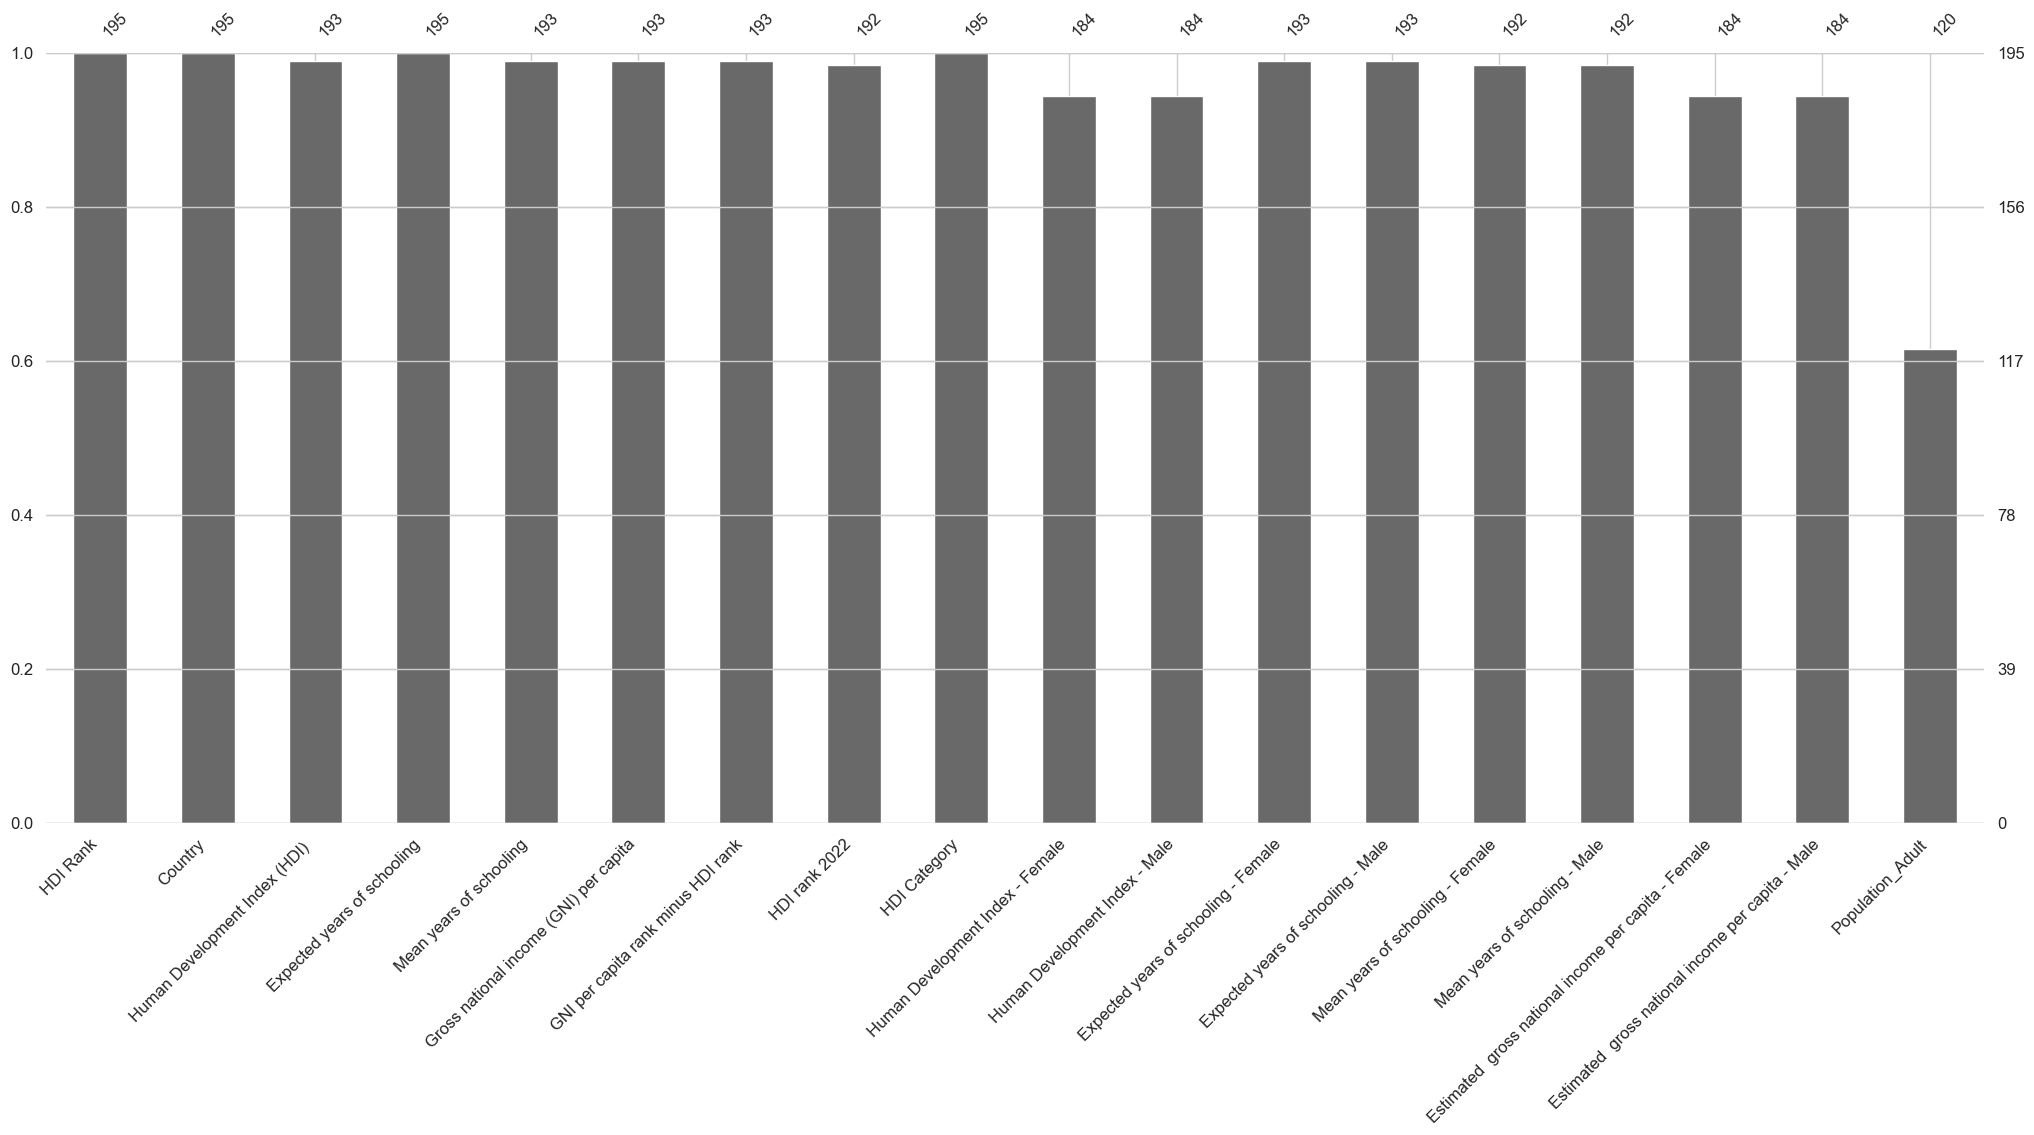

<Figure size 1400x600 with 0 Axes>

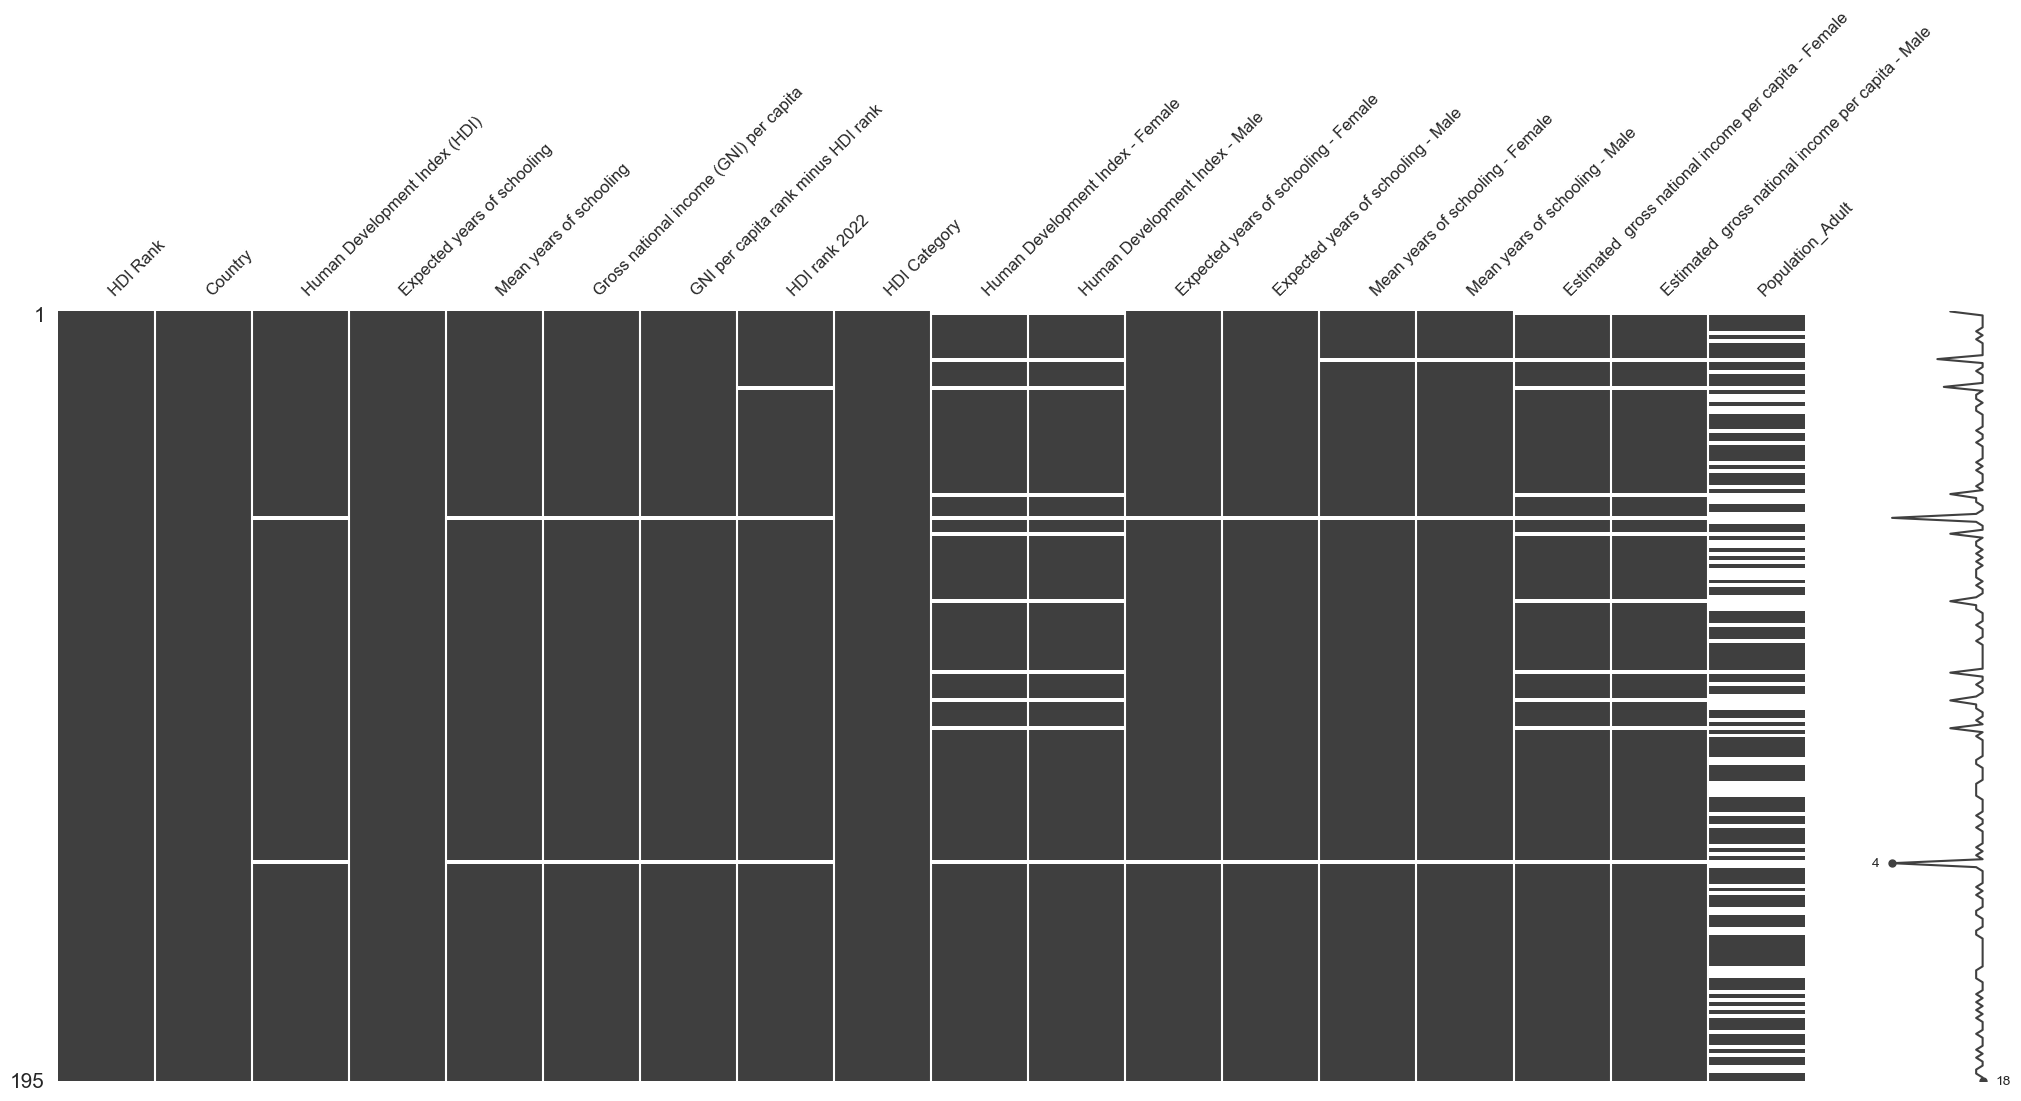

In [11]:
# missingness viz
plt.figure(figsize=(12,4))
msno.bar(df_clean, fontsize=12)
plt.show()

plt.figure(figsize=(14,6))
msno.matrix(df_clean.sample(min(200, len(df_clean))), fontsize=12)
plt.show()

In [12]:
# list columns with high missingness
missing_pct = (df_clean.isnull().sum() / len(df_clean) * 100).sort_values(ascending=False)
display(missing_pct.head(30))

# Mark columns >40% missing as candidates for drop
high_missing = missing_pct[missing_pct > 40].index.tolist()
print("High-missing columns (>40%):", high_missing)

Population_Adult                                        38.461538
Human Development Index - Female                         5.641026
Estimated  gross national income per capita - Male       5.641026
Estimated  gross national income per capita - Female     5.641026
Human Development Index - Male                           5.641026
HDI rank 2022                                            1.538462
Mean years of schooling - Male                           1.538462
Mean years of schooling - Female                         1.538462
Mean years of schooling                                  1.025641
Human Development Index (HDI)                            1.025641
Expected years of schooling - Male                       1.025641
Expected years of schooling - Female                     1.025641
Gross national income (GNI) per capita                   1.025641
GNI per capita rank minus HDI rank                       1.025641
Country                                                  0.000000
HDI Rank  

High-missing columns (>40%): []


Numeric columns used in correlation: ['HDI Rank', 'Human Development Index (HDI) ', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita', 'GNI per capita rank minus HDI rank', 'HDI rank 2022', 'Human Development Index - Female', 'Human Development Index - Male', 'Expected years of schooling - Female', 'Expected years of schooling - Male', 'Mean years of schooling - Female', 'Mean years of schooling - Male', 'Estimated  gross national income per capita - Female', 'Estimated  gross national income per capita - Male', 'Population_Adult']


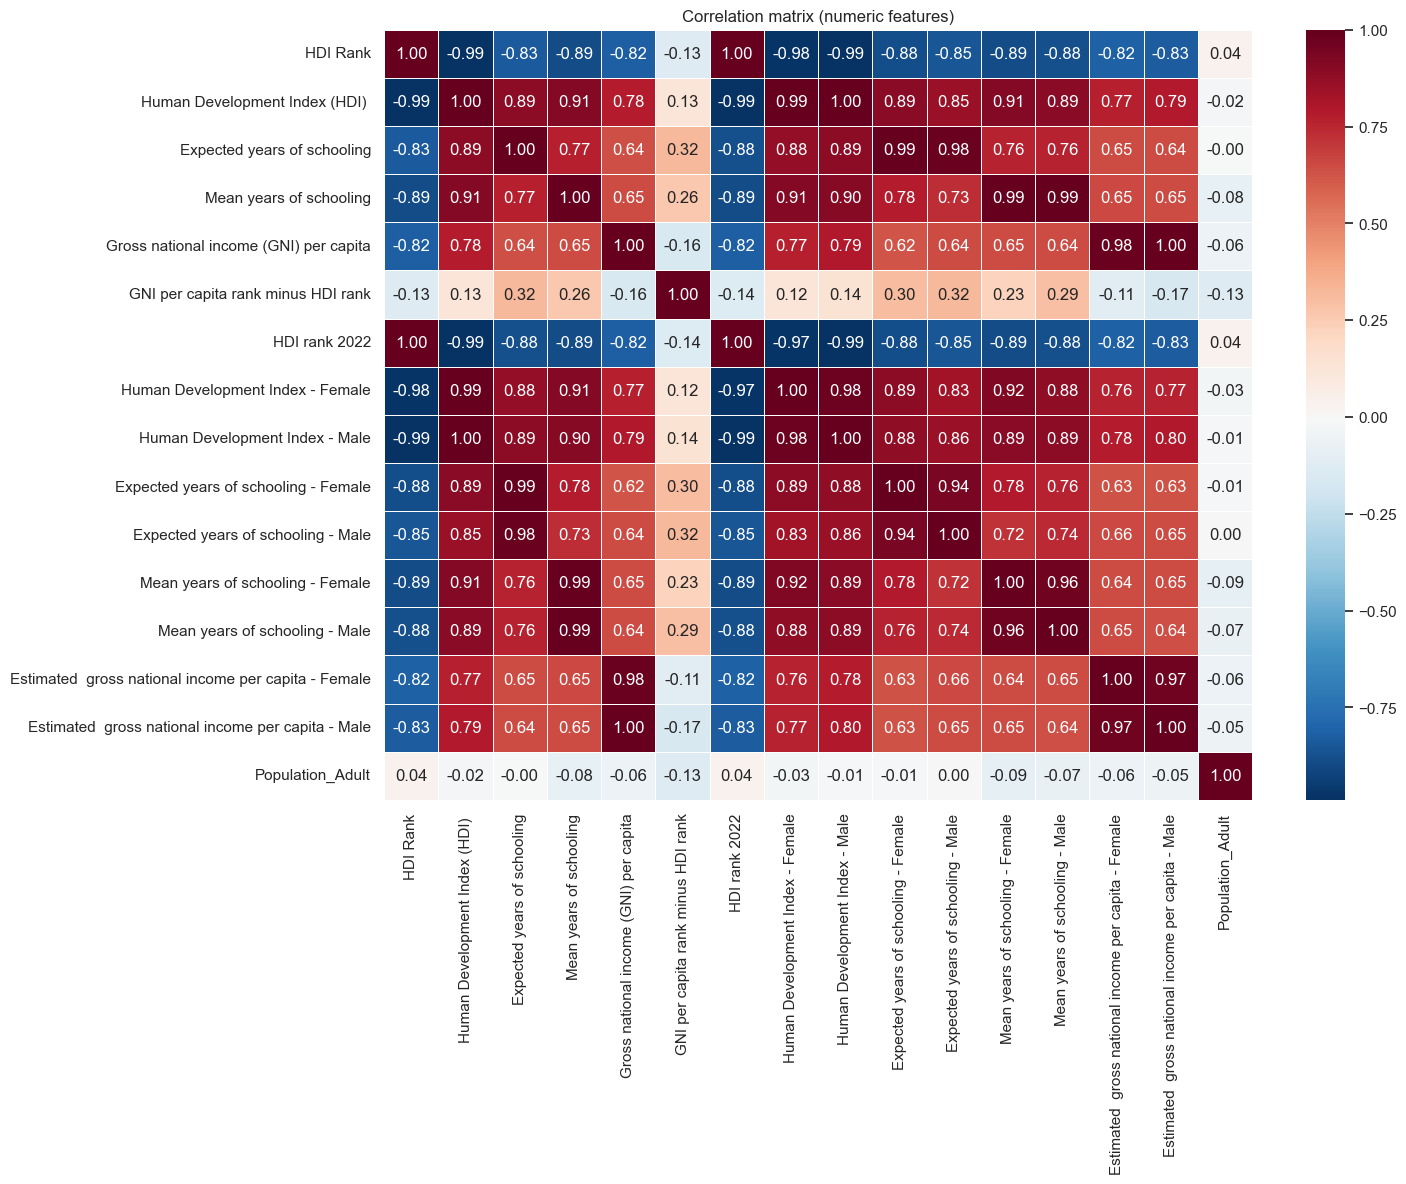

In [13]:
# numeric correlations
num_df = df_clean.select_dtypes(include=[np.number]).copy()
print("Numeric columns used in correlation:", num_df.columns.tolist())

plt.figure(figsize=(14,10))
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0, linewidths=0.5)
plt.title("Correlation matrix (numeric features)")
plt.show()

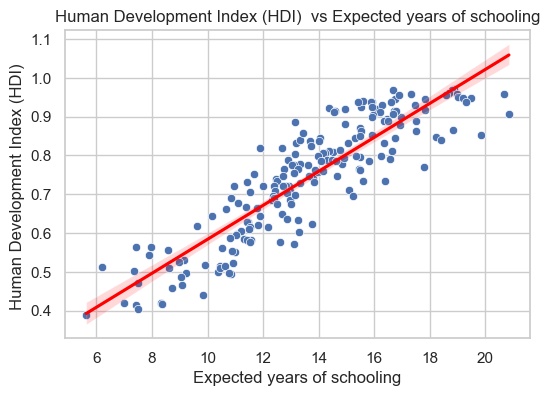

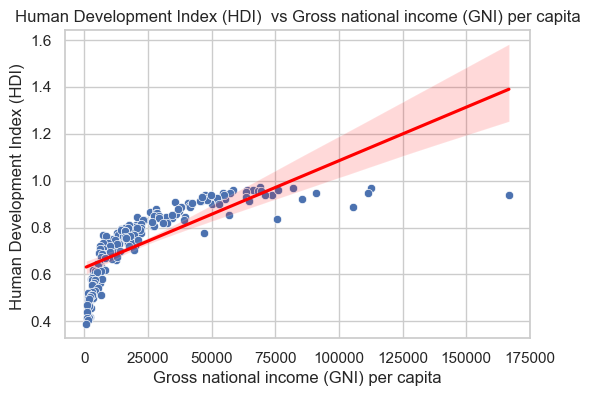

In [18]:
# scatter plots vs numeric HDI or a key column
NUMERIC_TARGET = "Human Development Index (HDI) "

if NUMERIC_TARGET in df_clean.columns:
    cols = ["Expected years of schooling", "Gross national income (GNI) per capita", "Life expectancy at birth"] 
    cols = [c for c in cols if c in df_clean.columns]
    for c in cols:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df_clean, x=c, y=NUMERIC_TARGET)
        sns.regplot(data=df_clean, x=c, y=NUMERIC_TARGET, scatter=False, color="red")
        plt.title(f"{NUMERIC_TARGET} vs {c}")
        plt.show()
else:
    print(f"{NUMERIC_TARGET} not found - skipping numeric scatterplots.")

Categorical columns (sample): ['Country']


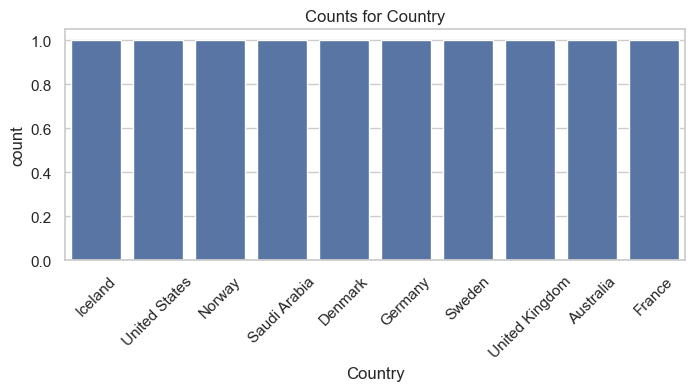

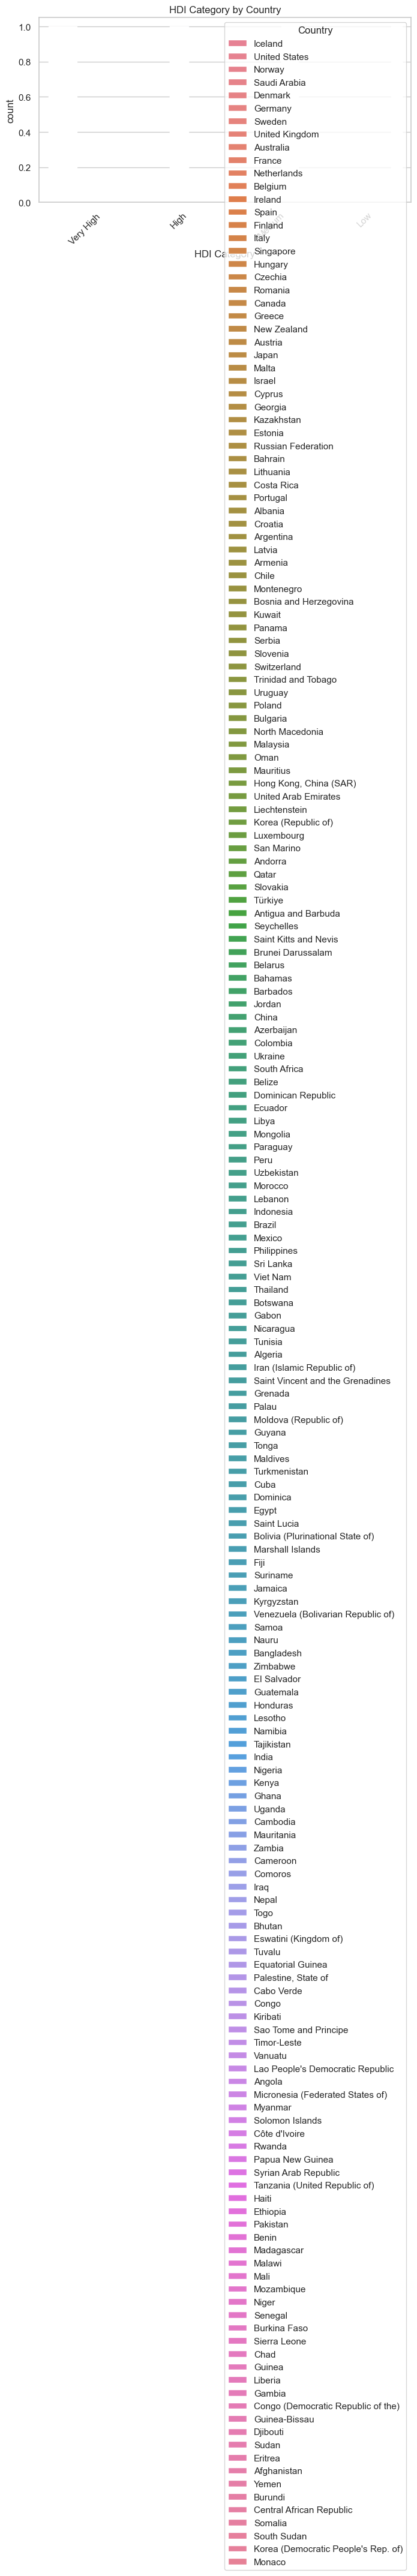

In [19]:
# categorical relationships
cat_cols = df_clean.select_dtypes(include=["object", "category"]).columns.tolist()
# remove target from this list
cat_cols = [c for c in cat_cols if c != TARGET_COL]

print("Categorical columns (sample):", cat_cols[:20])

# Plot countplot for target vs first few categorical columns
for c in cat_cols[:6]:
    plt.figure(figsize=(8,3))
    order = df_clean[c].value_counts().index[:10]
    sns.countplot(data=df_clean, x=c, order=order)
    plt.title(f"Counts for {c}")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(8,4))
    sns.countplot(data=df_clean, x=TARGET_COL, hue=c)
    plt.title(f"{TARGET_COL} by {c}")
    plt.xticks(rotation=45)
    plt.show()

In [20]:
# create simple engineered features (gaps/ratios)
df_fe = df_clean.copy()

pairs = [
    ("Expected years of schooling - Female", "Expected years of schooling - Male"),
    ("Human Development Index (HDI) - Female", "Human Development Index (HDI) - Male"),
    ("GNI per capita - Female", "GNI per capita - Male")
]

for f, m in pairs:
    if f in df_fe.columns and m in df_fe.columns:
        new_col = f"{m} - {f} (gap)"
        df_fe[new_col] = df_fe[m] - df_fe[f]

# example ratio
if "Gross national income (GNI) per capita" in df_fe.columns and "Population_Adult" in df_fe.columns:
    df_fe["gni_per_adult"] = df_fe["Gross national income (GNI) per capita"] / (df_fe["Population_Adult"].replace({0:np.nan}))

print("Created features sample:")
df_fe.head(3)

Created features sample:


,HDI Rank,Country,Human Development Index (HDI),Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank 2022,HDI Category,Human Development Index - Female,Human Development Index - Male,Expected years of schooling - Female,Expected years of schooling - Male,Mean years of schooling - Female,Mean years of schooling - Male,Estimated gross national income per capita - Female,Estimated gross national income per capita - Male,Population_Adult,Expected years of schooling - Male - Expected years of schooling - Female (gap),gni_per_adult
0,1,Iceland,0.972,18.85059,13.908926,69116.93736,12.0,3.0,Very High,0.959111,0.975500,20.19245,17.626040,13.991489,13.826582,56441.208584,81198.578187,322325.0,-2.56641,0.214432
1,17,United States,0.938,15.92300,13.910000,73650.03077,-7.0,18.0,Very High,0.937607,0.929333,16.82480,15.053850,14.000000,13.820000,60085.292235,87081.149933,275987833.0,-1.77095,0.000267
2,2,Norway,0.970,18.79285,13.117962,112710.02110,0.0,1.0,Very High,0.967123,0.972161,19.71855,17.917339,13.291107,12.955071,94568.748542,130572.891355,4608487.0,-1.80121,0.024457


In [21]:
#imple preprocessing pipeline: drop high-missing, impute numeric, encode categorical
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features (drop ids)
drop_cols = high_missing + ["Country", "HDI Rank", "HDI rank 2022"] 
features = [c for c in df_fe.columns if c not in drop_cols + [TARGET_COL]]
print("Candidate features:", len(features))

X = df_fe[features].copy()
y = df_fe[TARGET_COL].copy()

# Quick drop rows missing target
mask = y.notna()
X = X[mask]
y = y[mask]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# identify numeric & categorical cols
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# build transformers
num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median"))])
cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([("num", num_pipe, num_cols), ("cat", cat_pipe, cat_cols)])

Candidate features: 16
Numeric cols: ['Human Development Index (HDI) ', 'Expected years of schooling', 'Mean years of schooling', 'Gross national income (GNI) per capita', 'GNI per capita rank minus HDI rank', 'Human Development Index - Female', 'Human Development Index - Male', 'Expected years of schooling - Female', 'Expected years of schooling - Male', 'Mean years of schooling - Female', 'Mean years of schooling - Male', 'Estimated  gross national income per capita - Female', 'Estimated  gross national income per capita - Male', 'Population_Adult', 'Expected years of schooling - Male - Expected years of schooling - Female (gap)', 'gni_per_adult']
Categorical cols: []


Classification report (test):
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        10
         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         8
  Very High        1.00      1.00      1.00        15

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



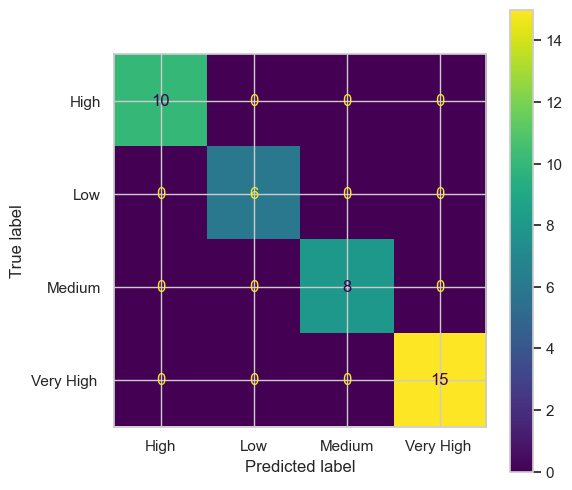

In [22]:
# baseline model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
print("Classification report (test):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.named_steps["clf"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.named_steps["clf"].classes_)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax)
plt.show()

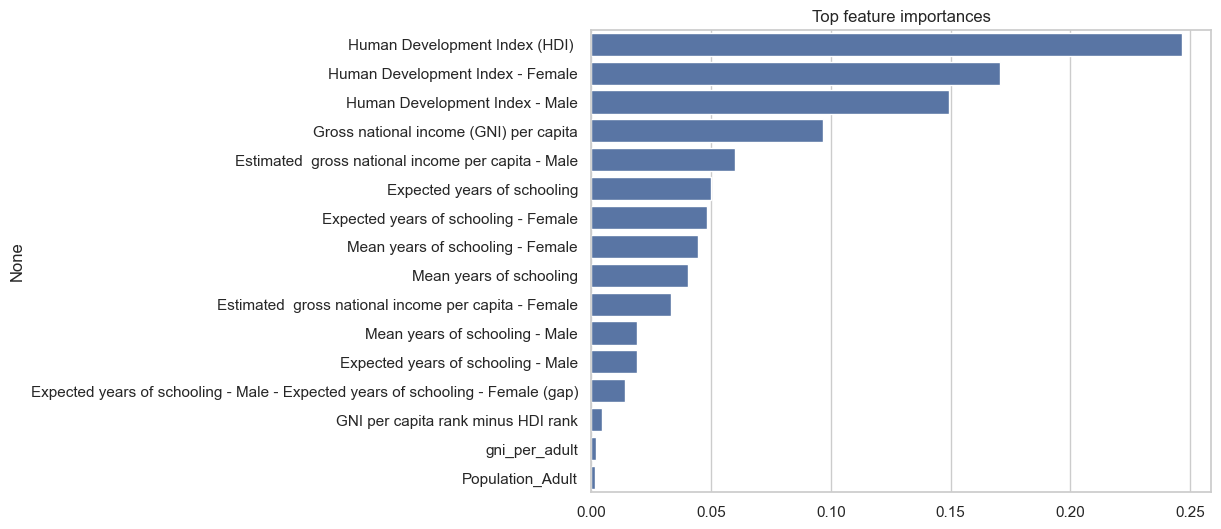

In [23]:
# feature importances (approx, after OHE)
ohe_cols = []
if cat_cols:
    # get ohe feature names
    ohe = clf.named_steps["preprocessor"].named_transformers_["cat"].named_steps["ohe"]
    cat_ohe_names = ohe.get_feature_names_out(cat_cols)
    ohe_cols = list(cat_ohe_names)

feat_names = num_cols + ohe_cols
importances = clf.named_steps["clf"].feature_importances_
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(30)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top feature importances")
plt.show()

In [24]:
import joblib
model_out = "hdi_category_model.pkl"

# Save entire pipeline (preprocessor + model)
joblib.dump(clf, model_out)
print("Saved model pipeline to", model_out)

Saved model pipeline to hdi_category_model.pkl


In [25]:
# summary printout for notebook
print("EDA done. Quick summary:")
print(f"Rows: {len(df)}  |  Features considered: {len(features)}")
print("Target distribution (train):")
print(y_train.value_counts())
print("Target distribution (test):")
print(y_test.value_counts())
print("\nSaved model pipeline: hdi_category_model.pkl\nNext steps: hyperparameter tuning, cross-validation, class-weight adjustments, more feature engineering (regional imputations), and model explainability (SHAP).")

EDA done. Quick summary:
Rows: 195  |  Features considered: 16
Target distribution (train):
HDI Category
Very High     59
High          40
Medium        35
Low           22
Name: count, dtype: int64
Target distribution (test):
HDI Category
Very High     15
High          10
Medium         8
Low            6
Name: count, dtype: int64

Saved model pipeline: hdi_category_model.pkl
Next steps: hyperparameter tuning, cross-validation, class-weight adjustments, more feature engineering (regional imputations), and model explainability (SHAP).


In [28]:
import numpy as np
import pandas as pd
import joblib

# Load model
model = joblib.load("hdi_category_model.pkl")

# Copy df_clean
df_fe = df_clean.copy()

# --- Recreate the engineered columns exactly as during training ---
pairs = [
    ("Expected years of schooling - Female", "Expected years of schooling - Male"),
    ("Human Development Index - Female", "Human Development Index - Male"),
    ("Estimated  gross national income per capita - Female", "Estimated  gross national income per capita - Male")
]

for f, m in pairs:
    if f in df_fe.columns and m in df_fe.columns:
        new_col = f"{m} - {f} (gap)"
        df_fe[new_col] = df_fe[m] - df_fe[f]

if "Gross national income (GNI) per capita" in df_fe.columns and "Population_Adult" in df_fe.columns:
    df_fe["gni_per_adult"] = df_fe["Gross national income (GNI) per capita"] / df_fe["Population_Adult"].replace({0: np.nan})

# Drop target before predicting
sample = df_fe.drop(columns=["HDI Category"]).iloc[[0]]

# Predict
pred = model.predict(sample)
print("Predicted HDI Category:", pred[0])

Predicted HDI Category: Very High 


In [31]:
# HDI Category Prediction Pipeline 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import joblib

# Load dataset
df = pd.read_excel("FAMLens Merged.xlsx")

# Data Cleaning Utilities
def to_numeric_safe(series):
    """Convert series to numeric, handling special symbols, commas, and text noise."""
    if series.dtype != "object":
        return series

    series = (
        series.astype(str)
        .replace({
            ",": "",
            "–": "-",
            "−": "-",
            "—": "-",
            "n/a": np.nan,
            "N/A": np.nan,
            "NA": np.nan,
            "": np.nan,
            " ": np.nan,
        })
        .replace(r"[^0-9\.\-]", "", regex=True)
    )

    return pd.to_numeric(series, errors="coerce")

# Apply cleaning to all numeric-like columns
for col in df.columns:
    try:
        df[col] = to_numeric_safe(df[col])
    except Exception:
        pass

# Feature Engineering
def safe_subtract(a, b):
    """Subtract two series safely, returning NaN on errors."""
    a, b = pd.to_numeric(a, errors="coerce"), pd.to_numeric(b, errors="coerce")
    return a - b

# Derived gap features
if all(c in df.columns for c in ["Expected years of schooling - Male", "Expected years of schooling - Female"]):
    df["Expected years of schooling gap"] = safe_subtract(
        df["Expected years of schooling - Male"],
        df["Expected years of schooling - Female"]
    )

if all(c in df.columns for c in ["Human Development Index - Male", "Human Development Index - Female"]):
    df["HDI gap"] = safe_subtract(
        df["Human Development Index - Male"],
        df["Human Development Index - Female"]
    )

if all(c in df.columns for c in [
    "Estimated  gross national income per capita - Male",
    "Estimated  gross national income per capita - Female"
]):
    df["GNI gap"] = safe_subtract(
        df["Estimated  gross national income per capita - Male"],
        df["Estimated  gross national income per capita - Female"]
    )

# Ratio feature example
if "Gross national income (GNI) per capita" in df.columns and "Population_Adult" in df.columns:
    df["gni_per_adult"] = df["Gross national income (GNI) per capita"] / df["Population_Adult"].replace({0: np.nan})

# Target & Features Setup
target = "HDI Category"
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in dataset.")

X = df.drop(columns=[target])
y = df[target].astype(str).fillna("Unknown")

# Identify feature types
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}, Categorical columns: {len(categorical_cols)}")

# Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Full Pipeline (Preprocessing + Model)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=4,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

# Train-Test Split & Training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("🚀 Training model...")
model.fit(X_train, y_train)

# Save Model
joblib.dump(model, "hdi_category_pipeline.pkl")
print("✅ Model pipeline saved as 'hdi_category_pipeline.pkl'")

# Evaluation
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

✅ Numeric columns: 21, Categorical columns: 0
🚀 Training model...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Country']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


✅ Model pipeline saved as 'hdi_category_pipeline.pkl'


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Country']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Country']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Training Accuracy: 1.0000
Test Accuracy: 1.0000


In [32]:
# for future inference
expected_features = X.columns.tolist()
joblib.dump(expected_features, "hdi_expected_features.pkl")
print("Feature schema saved as 'hdi_expected_features.pkl'")

Feature schema saved as 'hdi_expected_features.pkl'
